# Gathering of data

#Gather Data from the csv and txt files using pandas library

In [199]:
#Import Python library
import pandas as pd
from pandas.io.json import json_normalize
import json
import numpy as np
import requests
import io

In [200]:
#read twitter-archive-enhanced.csv  in dataframe
tae=pd.read_csv("twitter-archive-enhanced.csv")     

In [201]:
#read image-predictions.tsv in dataframe from URL
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
s=requests.get(url).content
ip=pd.read_csv(io.StringIO(s.decode('utf-8')), sep='\t')
ip.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

#Gather Data from Json file for tweet and retweet information using tweepy ibrary

In [202]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'XXXX'
consumer_secret = 'XXXX'
access_token = 'XXXX'
access_secret = 'XXXX'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tae.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805

Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
10

Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
13

Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
15

KeyboardInterrupt: 

Read above JSON file into pandas dataframe using pandas read_json function in UTF file format to avoid encoding issues while parsing the file.As each line contains multiple records hence lines='True' is enabled

In [204]:
js=pd.read_json('tweet_json.json',encoding="utf8",lines=True)

# Assessment of Data

# Explore twitter archived enhanced data

Visual Assessment

In [205]:
#View column level information
tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [206]:
#View Sample data for top 5 rows
tae.head(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None

Programmatic Assessment

In [207]:
#Get metrices for numeric variables
tae.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [208]:
#View Source column of the dataframe as the url is not clean anmd it contains multiple urls within same column
tae.source.head(5)

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [209]:
#Get name level counts from tweets for identification of issue
tae.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Tucker           10
Penny            10
Lola             10
Winston           9
Bo                9
the               8
Sadie             8
Toby              7
Daisy             7
Bailey            7
Buddy             7
an                7
Scout             6
Rusty             6
Stanley           6
Jack              6
Oscar             6
Milo              6
Koda              6
Leo               6
Dave              6
Bella             6
Jax               6
Larry             5
               ... 
Frönq             1
Jazzy             1
Duddles           1
Huck              1
Tommy             1
Chaz              1
officially        1
Longfellow        1
Pete              1
Cleopatricia      1
Cedrick           1
Jaspers           1
Major             1
Anna              1
Einstein          1
Rose              1
Ace               1
Goliath           1
Dwight            1


In [210]:
#View expanded URL to confirm issue in the column
tae.expanded_urls.head(10)

0    https://twitter.com/dog_rates/status/892420643...
1    https://twitter.com/dog_rates/status/892177421...
2    https://twitter.com/dog_rates/status/891815181...
3    https://twitter.com/dog_rates/status/891689557...
4    https://twitter.com/dog_rates/status/891327558...
5    https://twitter.com/dog_rates/status/891087950...
6    https://gofundme.com/ydvmve-surgery-for-jax,ht...
7    https://twitter.com/dog_rates/status/890729181...
8    https://twitter.com/dog_rates/status/890609185...
9    https://twitter.com/dog_rates/status/890240255...
Name: expanded_urls, dtype: object

In [211]:
#Get rating _ denominator level metics
tae.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [212]:
#Get numerator level metrics
tae.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [213]:
#Check if the tweet is originial or a retweet 
tae.retweeted_status_id.isna() 

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19      False
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
2326     True
2327     True
2328     True
2329     True
2330     True
2331     True
2332     True
2333     True
2334     True
2335     True
2336     True
2337     True
2338     True
2339     True
2340     True
2341     True
2342     True
2343     True
2344     True
2345     True
2346     True
2347     True
2348     True
2349     True
2350     True
2351     True
2352     True
2353     True
2354     True
2355     True
Name: retweeted_status_id, Length: 2356, dtype: bool

Visual and Programatic assessment observations for Twitter archived data:

    
1.Source column contains multiple url ==>Quality Issue

2.Name of dog is incorrect as a/ the are present  ==>Quality issue

3.Doggo/floofer/pupper/ stages are in different columns ==> Tidyness issue

4.Multiple url present in the expanded url column tae['expanded_urls'][27]==> Quality issue

5.tae['rating_denominator'] is incorrect as column data is incorrect . Hence need to pick this up directly from the text.  ==>Quality issue

6.tae['rating_numerator'] is less than 10 which is highly unlikely, may be the person has forgot to type 1 infront of single digits hence adding 10 to single digit number ratings Also instead of 9.75 the numerator is mentioned as 75, hence need to pick this up from text instead. ==>Quality issue    

# Assessment of image-predictions data

Visual Assessment

In [214]:
#Visual assessment of columns
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [215]:
#View sample of data
ip.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

Programatic Assessment

In [216]:
#Get metrics of numeric variables
ip.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

Visual and Programatic assessment observations for Twitter archived data:

1. Here it is a tidyness issue because P, P_conf,P_dog indicates the Dog breed, Probability and whether the predict species is a dog or not. Hence, they all should be in their respective single columns of Dog_breed_prediction, Probability and Is_Dog to avoid violaition of tidyness rules.

# Assessment of JSON retweet data 

In [217]:
#Get column level view
js.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [218]:
#Visual inspection of JSON data 
js.head(5)

contributors  coordinates          created_at display_text_range  \
0           NaN          NaN 2017-08-01 16:23:56            [0, 85]   
1           NaN          NaN 2017-08-01 00:17:27           [0, 138]   
2           NaN          NaN 2017-07-31 00:18:03           [0, 121]   
3           NaN          NaN 2017-07-30 15:58:51            [0, 79]   
4           NaN          NaN 2017-07-29 16:00:24           [0, 138]   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [], 'symbols': [], 'user_mentions...   
2  {'hashtags': [], 'symbols': [], 'user_mentions...   
3  {'hashtags': [], 'symbols': [], 'user_mentions...   
4  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  favorite_count  \
0  {'media': [{'id': 892420639486877696, 'id_str'...           39467   
1  {'media': [{'id': 892177413194625024, 'id_str'...           33819   
2  {'media': [{'id': 891815175371796480, 'id_str'...           25461   
3  {'media': [{'id': 891689552724799489, 'id_str'...           42908   
4  {'media': [{'id': 891327551943041024, 'id_str'...           41048   

   favorited                                          full_text  geo  \
0      False  This is Phineas. He's a mystical boy. Only eve...  NaN   
1      False  This is Tilly. She's just checking pup on you....  NaN   
2      False  This is Archie. He is a rare Norwegian Pouncin...  NaN   
3      False  This is Darla. She commenced a snooze mid meal...  NaN   
4      False  This is Franklin. He would like you to stop ca...  NaN   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

   possibly_sensitive_appealable  quoted_status quoted_status_id  \
0                            0.0            NaN              NaN   
1                            0.0            NaN              NaN   
2                            0.0            NaN              NaN   
3                            0.0            NaN              NaN   
4                            0.0            NaN              NaN   

   quoted_status_id_str  retweet_count  retweeted  retweeted_status  \
0                   NaN           8853      False               NaN   
1                   NaN           6514      False               NaN   
2                   NaN           4328      False               NaN   
3                   NaN           8964      False               NaN   
4                   NaN           9774      False               NaN   

                                              source truncated  \
0  <a href="http://twitter.com/download/iphone" r...     False   
1  <a href="http://twitter.com/download/iphone" r...     False   
2  <a href="http://twitter.com/download/iphone" r...     False   
3  <a href="http://twitter.com/download/iphone" r...     False   
4  <a href="http://twitter.com/download/iphone" r...     False   

                                                user  
0  {'id': 4196983835, 'id_str': '4196983835', 'na...  
1  {'id': 4196983835, 'id_str': '4196983835', 'na...  
2  {'id': 4196983835, 'id_str': '4196983835', 'na...  
3  {'id': 4196983835, 'id_str': '4196983835', 'na...  
4  {'id': 4196983835, 'id_str': '4196983835', 'na...  

[5 rows x 31 columns]

In [219]:
#Visual inspection of column level data "user" which is dictionary which needs nested level parsing
user=json_normalize(js['user'])
user.describe()

favourites_count  followers_count  friends_count            id  \
count       2354.000000     2.354000e+03         2354.0  2.354000e+03   
mean      114031.010195     3.200942e+06          104.0  4.196984e+09   
std            0.100478     4.457302e+01            0.0  0.000000e+00   
min       114031.000000     3.200799e+06          104.0  4.196984e+09   
25%       114031.000000     3.200898e+06          104.0  4.196984e+09   
50%       114031.000000     3.200945e+06          104.0  4.196984e+09   
75%       114031.000000     3.200953e+06          104.0  4.196984e+09   
max       114032.000000     3.201018e+06          104.0  4.196984e+09   

       listed_count  statuses_count  
count   2354.000000          2354.0  
mean    2799.480884          5288.0  
std       11.178223             0.0  
min     2724.000000          5288.0  
25%     2788.000000          5288.0  
50%     2803.000000          5288.0  
75%     2805.000000          5288.0  
max     2846.000000          5288.0

Programatic assessment

In [220]:
#Get numeric metrics
js.describe()

contributors  coordinates  favorite_count  geo            id  \
count           0.0          0.0     2354.000000  0.0  2.354000e+03   
mean            NaN          NaN     8080.968564  NaN  7.426978e+17   
std             NaN          NaN    11814.771334  NaN  6.852812e+16   
min             NaN          NaN        0.000000  NaN  6.660209e+17   
25%             NaN          NaN     1415.000000  NaN  6.783975e+17   
50%             NaN          NaN     3603.500000  NaN  7.194596e+17   
75%             NaN          NaN    10122.250000  NaN  7.993058e+17   
max             NaN          NaN   132810.000000  NaN  8.924206e+17   

             id_str  in_reply_to_status_id  in_reply_to_status_id_str  \
count  2.354000e+03           7.800000e+01               7.800000e+01   
mean   7.426978e+17           7.455079e+17               7.455079e+17   
std    6.852812e+16           7.582492e+16               7.582492e+16   
min    6.660209e+17           6.658147e+17               6.658147e+17   
25%    6.783975e+17           6.757419e+17               6.757419e+17   
50%    7.194596e+17           7.038708e+17               7.038708e+17   
75%    7.993058e+17           8.257804e+17               8.257804e+17   
max    8.924206e+17           8.862664e+17               8.862664e+17   

       in_reply_to_user_id  in_reply_to_user_id_str  possibly_sensitive  \
count         7.800000e+01             7.800000e+01              2211.0   
mean          2.014171e+16             2.014171e+16                 0.0   
std           1.252797e+17             1.252797e+17                 0.0   
min           1.185634e+07             1.185634e+07                 0.0   
25%           3.086374e+08             3.086374e+08                 0.0   
50%           4.196984e+09             4.196984e+09                 0.0   
75%           4.196984e+09             4.196984e+09                 0.0   
max           8.405479e+17             8.405479e+17                 0.0   

       possibly_sensitive_appealable  quoted_status_id  quoted_status_id_str  \
count                         2211.0      2.900000e+01          2.900000e+01   
mean                             0.0      8.162686e+17          8.162686e+17   
std                              0.0      6.164161e+16          6.164161e+16   
min                              0.0      6.721083e+17          6.721083e+17   
25%                              0.0      7.888183e+17          7.888183e+17   
50%                              0.0      8.340867e+17          8.340867e+17   
75%                              0.0      8.664587e+17          8.664587e+17   
max                              0.0      8.860534e+17          8.860534e+17   

       retweet_count  
count    2354.000000  
mean     3164.797366  
std      5284.770364  
min         0.000000  
25%       624.500000  
50%      1473.500000  
75%      3652.000000  
max     79515.000000

#Visual and Programatic assessment observations for Retweet JSON data:

1. source column has unclean url as it contains multiple urls within the same column which need to be expanded into different columns.                       
                                          
2. js['user'] has dictionay instead of single information data But Since we are now extracting only retweet_count and favorite_count which is readily available in dataframe.Hence we can leave nested parsing of this column instead of applying and cleaning using apply(pd.Series) method.


# Compiled list of all observed data Issues 


Data Quality Issue #1. The type of timestamp need to change from object to datetype for twitter archived data	

Data Quality Issue #2. Clean source column by removing multiple urls within a same column and HTML tags

Data Quality Issue #3. Cleaning of Numerator ratings by extracting them from text directly and setting datatype as float.

Data Quality Issue #4. Clean Denominator ratings by extracting them directly from text and correct datatype

Data Quality Issue #5. Value 'None' in the twitter archived dataset is string than none type.Replace string "None" with datatype "None".

Data Quality Issue #6 Multiple url present in the single column tae['expanded_urls']. Resolve them into different columns 

Data Quality Issue #7.Name of dog is incorrect as a/ the are present set them as None using np.in1d function from the List of incorrect names

Data Quality Issue #8 . js['user'] has dictionay instead of single information data hence the data has been nomalised and appended with original dataframe after flattening JSON data

Data Quality issue #9. Clean the source column containings URL information by removing multiple urls from one column in the JSON data.


Tidyness Issue #1. Dog stages should be in single column stage than in multiple column for each dog type.

#Tidyness Issue 2. In Image prediction Data, the column P1,P2,P3(Prediction) , P1_conf,P2_conf,P3_conf( the confidence of predicton ), and P1_dog,P2_dogP3_dog should be put into their single columns than splitting up into 3 columns as they represents the same information. So the P1,P2,P3 should be put into single column dog_type, P1_conf,P2_conf,P3_conf into dog_conf and "p1_dog","p2_dog","p3_dog" into IS_dog column

#Tidyness Issue 3: The datasets Twitter archive, Json data and image prediction data are part of same dataset, hence ned to be combined togther to form a master dataset for analysis.

# Cleaning of data

Cleaning of twitter archived enhanced data

Create a copy of twitter archived data for cleaning

In [221]:
tae_clean=tae.copy()

Define: 
#Quality Issue 1. The type of timestamp need to change from object to datetype for twitter archived data

In [222]:
#Clean
tae_clean['timestamp'] = pd.to_datetime(tae_clean['timestamp']) 

In [223]:
#Test
tae_clean['timestamp'].dtypes

dtype('<M8[ns]')

Define Quality Issue 2. Clean source column by removing multiple urls within a same column and HTML tags

In [224]:
#Clean
tae_clean['source']=tae_clean['source'].str.extract('(\\(?\\b(http://|www[.])[-A-Za-z0-9+&amp;@#/%?=~_()|!:,.;]*[-A-Za-z0-9+&amp;@#/%=~_()|])')[0]

In [225]:
#Test
tae_clean['source'].value_counts()

http://twitter.com/download/iphone    2221
http://vine.co                          91
http://twitter.com                      33
Name: source, dtype: int64

Define Data Quality Issue 3. Cleaning of Numerator ratings by extracting them from text directly and setting datatype as float.

In [226]:
#Clean
# Fetch all ratings i.e. both numerator and denominator
ratings = tae_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [227]:
#Clean
#Set numerator ratings and modify datatype as float

In [228]:
#Clean
tae_clean['rating_numerator']=ratings[0]
tae_clean['rating_numerator']=tae_clean['rating_numerator'].astype("float")

In [229]:
#Test
#Confirm numerator rating correction
tae_clean['rating_numerator'].value_counts()

12.00      558
11.00      464
10.00      461
13.00      351
9.00       158
8.00       102
7.00        55
14.00       54
5.00        35
6.00        32
3.00        19
4.00        17
2.00         9
1.00         9
0.00         2
420.00       2
9.75         2
15.00        2
960.00       1
84.00        1
24.00        1
17.00        1
13.50        1
143.00       1
121.00       1
80.00        1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
666.00       1
99.00        1
11.27        1
11.26        1
88.00        1
144.00       1
9.50         1
20.00        1
44.00        1
60.00        1
50.00        1
Name: rating_numerator, dtype: int64

Define Data Quality Issue 4. Clean Denominator ratings by extracting them directly from text and correct datatype

In [230]:
#Clean
#Set denominator ratings and modify datatype as float
tae_clean['rating_denominator']=ratings[1]
tae_clean['rating_denominator']=tae_clean['rating_denominator'].astype("float")

In [231]:
#Test
#Confirm rating denominator has been cleaned up
tae_clean['rating_denominator'].value_counts()

10.0     2333
11.0        3
50.0        3
20.0        2
80.0        2
110.0       1
0.0         1
15.0        1
7.0         1
150.0       1
16.0        1
120.0       1
2.0         1
170.0       1
70.0        1
130.0       1
90.0        1
40.0        1
Name: rating_denominator, dtype: int64

Define Data Quality Issue #5. Value 'None' in the twitter archived dataset is string than none type.Replace string "None" with datatype "None".

In [232]:
#Clean
tae_clean['doggo'].replace('None', np.nan, inplace=True)
tae_clean['floofer'].replace('None', np.nan, inplace=True)
tae_clean['pupper'].replace('None', np.nan, inplace=True)
tae_clean['puppo'].replace('None', np.nan, inplace=True)

In [233]:
#Confirm if String "None" has been replacd with correct "None" type 

In [234]:
#Test
tae_clean['doggo'].dtypes

dtype('O')

In [235]:
#Test
tae_clean['floofer'].dtypes

dtype('O')

In [236]:
#Test
tae_clean['pupper'].dtypes

dtype('O')

In [237]:
#Test
tae_clean['puppo'].dtypes

dtype('O')

Define Data Quality Issue #6 Multiple url present in the single column tae['expanded_urls']. Resole them into different columns 

In [238]:
#Clean expanded urls columns by splitting them 
#Clean
tae_clean['expanded_urls']=pd.Series(tae_clean['expanded_urls']).str.strip()
df=tae_clean['expanded_urls'].str.split(",",expand=True)
df.head()

0  \
0  https://twitter.com/dog_rates/status/892420643...   
1  https://twitter.com/dog_rates/status/892177421...   
2  https://twitter.com/dog_rates/status/891815181...   
3  https://twitter.com/dog_rates/status/891689557...   
4  https://twitter.com/dog_rates/status/891327558...   

                                                   1     2     3     4     5  \
0                                               None  None  None  None  None   
1                                               None  None  None  None  None   
2                                               None  None  None  None  None   
3                                               None  None  None  None  None   
4  https://twitter.com/dog_rates/status/891327558...  None  None  None  None   

      6     7  
0  None  None  
1  None  None  
2  None  None  
3  None  None  
4  None  None

In [239]:
#assign epanded urls 
#Clean
tae_clean['expanded_url1']=df[0]
tae_clean['expanded_url2']=df[1]
tae_clean['expanded_url3']=df[2]
tae_clean['expanded_url4']=df[3]
tae_clean['expanded_url5']=df[4]
tae_clean['expanded_url6']=df[5]
tae_clean['expanded_url7']=df[6]
tae_clean['expanded_url8']=df[7]
#drop original unclean column
tae_clean=tae_clean.drop(['expanded_urls'],axis=1)

In [240]:
#Test
#Confirm if columns expanded successfully with no multiple URL within the same column
tae_clean['expanded_url1'].value_counts()

https://twitter.com/dog_rates/status/786709082849828864/photo/1    2
https://twitter.com/dog_rates/status/680055455951884288/photo/1    2
https://www.gofundme.com/3hgsuu0                                   2
https://twitter.com/dog_rates/status/801167903437357056/photo/1    2
https://www.loveyourmelon.com/pages/ourstory                       2
https://twitter.com/dog_rates/status/700747788515020802/photo/1    2
https://twitter.com/dog_rates/status/795076730285391872/photo/1    2
https://twitter.com/dog_rates/status/739979191639244800/photo/1    2
https://twitter.com/dog_rates/status/790946055508652032/photo/1    2
https://twitter.com/dog_rates/status/800141422401830912/photo/1    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1    2
https://twitter.com/dog_rates/status/683391852557561860/photo/1    2
https://twitter.com/dog_rates/status/775733305207554048/photo/1    2
https://twitter.com/dog_rates/status/822244816520155136/photo/1    2
https://www.gofundme.com/3ti3nps  

In [241]:
#Test
#Confirm if columns expanded successfully with no repetion
tae_clean['expanded_url2'].value_counts()

https://twitter.com/dog_rates/status/694669722378485760/photo/1      2
https://twitter.com/dog_rates/status/774314403806253056/photo/1      2
https://twitter.com/dog_rates/status/795076730285391872/photo/1      2
https://twitter.com/dog_rates/status/837820167694528512/photo/1      2
https://twitter.com/dog_rates/status/815990720817401858/photo/1      2
https://twitter.com/dog_rates/status/835264098648616962/photo/1      2
https://twitter.com/dog_rates/status/796149749086875649/photo/1      2
https://twitter.com/dog_rates/status/840632337062862849/photo/1      2
https://twitter.com/dog_rates/status/756288534030475264/photo/1      2
https://twitter.com/dog_rates/status/687317306314240000/photo/1      2
https://twitter.com/dog_rates/status/820749716845686786/photo/1      2
https://twitter.com/dog_rates/status/769940425801170949/photo/1      2
https://twitter.com/dog_rates/status/789530877013393408/photo/1      2
https://twitter.com/dog_rates/status/782305867769217024/photo/1      2
https:

In [242]:
#Test
#Confirm if columns expanded successfully with no repetion
tae_clean['expanded_url8'].value_counts()

https://twitter.com/dog_rates/status/819006400881917954/photo/1    1
https://twitter.com/dog_rates/status/819004803107983360/photo/1    1
https://twitter.com/dog_rates/status/673320132811366400/photo/1    1
https://twitter.com/dog_rates/status/779834332596887552/photo/1    1
Name: expanded_url8, dtype: int64

Define Data Quality Issue #7.Name of dog is incorrect as a/ the are present set them as None using np.in1d function from the List of incorrect names

In [243]:
#Clean
x=['a','an','the','None','that', 'this']
#cleaning names
tae_clean['name']=np.where(np.in1d(tae_clean['name'],x) ,'None',tae_clean['name'])

In [244]:
#Test
#check & confirm cleanness of names
tae_clean.name.value_counts()

None          816
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Tucker         10
Lola           10
Penny          10
Bo              9
Winston         9
Sadie           8
Bailey          7
Toby            7
Daisy           7
Buddy           7
Scout           6
Rusty           6
Jax             6
Koda            6
Oscar           6
Bella           6
Stanley         6
Dave            6
Jack            6
Milo            6
Leo             6
Larry           5
Finn            5
Sammy           5
Louis           5
             ... 
Stephanus       1
Lorelei         1
Frönq           1
Jazzy           1
Duddles         1
officially      1
Florence        1
Roscoe          1
Ace             1
Cora            1
Longfellow      1
Charleson       1
Cedrick         1
Jaspers         1
Major           1
Anna            1
Einstein        1
Rose            1
Goliath         1
Jangle          1
Pete            1
Dwight          1
Rudy            1
Shiloh          1
Buckley   

Define :Data Quality Issue #8 . js['user'] has dictionay instead of single information data hence the data has been nomalised and appended with original dataframe after flattening JSON data

In [245]:
js.head(1)

contributors  coordinates          created_at display_text_range  \
0           NaN          NaN 2017-08-01 16:23:56            [0, 85]   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                   extended_entities  favorite_count  \
0  {'media': [{'id': 892420639486877696, 'id_str'...           39467   

   favorited                                          full_text  geo  \
0      False  This is Phineas. He's a mystical boy. Only eve...  NaN   

                         ...                          \
0                        ...                           

   possibly_sensitive_appealable  quoted_status quoted_status_id  \
0                            0.0            NaN              NaN   

   quoted_status_id_str  retweet_count  retweeted  retweeted_status  \
0                   NaN           8853      False               NaN   

                                              source truncated  \
0  <a href="http://twitter.com/download/iphone" r...     False   

                                                user  
0  {'id': 4196983835, 'id_str': '4196983835', 'na...  

[1 rows x 31 columns]

In [246]:
#Clean by expanding dictornary column "User"
user_tmp = json_normalize(js['user'])
user_tmp.rename(columns={'id': 'userid'}, inplace=True)
frames=[js,user_tmp]
js1=pd.concat(frames,sort=False)
js1.drop(['user'],axis=1)

contributors  coordinates                      created_at  \
0              NaN          NaN             2017-08-01 16:23:56   
1              NaN          NaN             2017-08-01 00:17:27   
2              NaN          NaN             2017-07-31 00:18:03   
3              NaN          NaN             2017-07-30 15:58:51   
4              NaN          NaN             2017-07-29 16:00:24   
5              NaN          NaN             2017-07-29 00:08:17   
6              NaN          NaN             2017-07-28 16:27:12   
7              NaN          NaN             2017-07-28 00:22:40   
8              NaN          NaN             2017-07-27 16:25:51   
9              NaN          NaN             2017-07-26 15:59:51   
10             NaN          NaN             2017-07-26 00:31:25   
11             NaN          NaN             2017-07-25 16:11:53   
12             NaN          NaN             2017-07-25 01:55:32   
13             NaN          NaN             2017-07-25 00:10:02   
14             NaN          NaN             2017-07-24 17:02:04   
15             NaN          NaN             2017-07-24 00:19:32   
16             NaN          NaN             2017-07-23 00:22:39   
17             NaN          NaN             2017-07-22 16:56:37   
18             NaN          NaN             2017-07-22 00:23:06   
19             NaN          NaN             2017-07-20 16:49:33   
20             NaN          NaN             2017-07-19 16:06:48   
21             NaN          NaN             2017-07-19 03:39:09   
22             NaN          NaN             2017-07-19 00:47:34   
23             NaN          NaN             2017-07-18 16:08:03   
24             NaN          NaN             2017-07-18 00:07:08   
25             NaN          NaN             2017-07-17 16:17:36   
26             NaN          NaN             2017-07-16 23:58:41   
27             NaN          NaN             2017-07-16 20:14:00   
28             NaN          NaN             2017-07-15 23:25:31   
29             NaN          NaN             2017-07-15 16:51:35   
...            ...          ...                             ...   
2324           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2325           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2326           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2327           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2328           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2329           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2330           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2331           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2332           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2333           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2334           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2335           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2336           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2337           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2338           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2339           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2340           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2341           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2342           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2343           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2344           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2345           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2346           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2347           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2348           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2349           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2350           NaN          NaN  Sun Nov 15 21:41:29 +0000 2015   
2351           NaN          NaN  Sun Nov 15 21:41:29 

In [247]:
#Test
js1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4708 entries, 0 to 2353
Data columns (total 71 columns):
contributors                          0 non-null float64
coordinates                           0 non-null float64
created_at                            4708 non-null object
display_text_range                    2354 non-null object
entities                              2354 non-null object
extended_entities                     2073 non-null object
favorite_count                        2354 non-null float64
favorited                             2354 non-null object
full_text                             2354 non-null object
geo                                   0 non-null float64
id                                    2354 non-null float64
id_str                                4708 non-null object
in_reply_to_screen_name               78 non-null object
in_reply_to_status_id                 78 non-null float64
in_reply_to_status_id_str             78 non-null float64
in_reply_to_user

Data Quality issue #9. Clean the source column containings URL information by removing multiple urls from one column

In [248]:
js_clean=js1.copy()
js_clean.source=js_clean['source'].str.extract('(\\(?\\b(http://|www[.])[-A-Za-z0-9+&amp;@#/%?=~_()|!:,.;]*[-A-Za-z0-9+&amp;@#/%=~_()|])')[0]

In [249]:
#Fetch Tweetid, retweet_count and favorite_count and in_reply_to_status_id
js_retweet=js_clean[['id','retweet_count','favorite_count','in_reply_to_status_id']]
js_retweet.describe()

id  retweet_count  favorite_count  in_reply_to_status_id
count  2.354000e+03    2354.000000     2354.000000           7.800000e+01
mean   7.426978e+17    3164.797366     8080.968564           7.455079e+17
std    6.852812e+16    5284.770364    11814.771334           7.582492e+16
min    6.660209e+17       0.000000        0.000000           6.658147e+17
25%    6.783975e+17     624.500000     1415.000000           6.757419e+17
50%    7.194596e+17    1473.500000     3603.500000           7.038708e+17
75%    7.993058e+17    3652.000000    10122.250000           8.257804e+17
max    8.924206e+17   79515.000000   132810.000000           8.862664e+17

# All the Data Qaulity issues has been  corrected till now. Lets tackle the Tidyness issues!! 

In [250]:
#Tidyness Issue correction

Tidyness Issue #1. Dog stages should be in single column stage than in multiple column for each dog type.

In [251]:
tae_clean['stage'] = tae_clean.doggo.fillna('') + tae_clean.floofer.fillna('') + tae_clean.pupper.fillna('') + tae_clean.puppo.fillna('')
tae_clean.loc[tae_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
tae_clean.loc[tae_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
tae_clean.loc[tae_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'
tae_clean.loc[tae_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [252]:
tae_clean['stage'].value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

In [253]:
#drop extra columns
tae_clean=tae_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

#Tidyness Issue 2. In Image prediction Data, the column P1,P2,P3(Prediction) , P1_conf,P2_conf,P3_conf( the confidence of predicton ), and P1_dog,P2_dogP3_dog should be put into their single columns than splitting up into 3 columns as they represents the same information. So the P1,P2,P3 should be put into single column dog_type, P1_conf,P2_conf,P3_conf into dog_conf and "p1_dog","p2_dog","p3_dog" into IS_dog column

In [254]:
#Tidy Prediction(P) column and store results in temporary dataframe
ip_modified1=pd.melt(ip,id_vars=["tweet_id","jpg_url","img_num","p1_conf","p1_dog","p2_conf","p2_dog","p3_conf","p3_dog"],value_vars=["p1","p2","p3"],value_name="dog_type")

In [255]:
#Tidy confidance interval and store results in temporary dataframe

In [256]:
ip_modified2=pd.melt(ip_modified1,id_vars=["tweet_id","jpg_url","img_num","p1_dog","p2_dog","p3_dog","dog_type"],value_vars=["p1_conf","p2_conf","p3_conf"],value_name="dog_conf")

In [257]:
#Tidying of IS_DOG prediction column and storing results in final dataframe

In [258]:
#Tidying of IS_DOG prediction column and storing results in final dataframe
ip_clean=pd.melt(ip_modified2,id_vars=["tweet_id","jpg_url","img_num","dog_conf","dog_type"],value_vars=["p1_dog","p2_dog","p3_dog"],value_name="Is_Dog")
ip_clean=ip_clean.drop('variable',axis=1)

In [259]:
# checking count of each variable to confirm fix
ip_clean.count()

tweet_id    56025
jpg_url     56025
img_num     56025
dog_conf    56025
dog_type    56025
Is_Dog      56025
dtype: int64

In [260]:
ip_clean.head(5)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num  dog_conf                dog_type  Is_Dog  
0        1  0.465074  Welsh_springer_spaniel    True  
1        1  0.506826                 redbone    True  
2        1  0.596461         German_shepherd    True  
3        1  0.408143     Rhodesian_ridgeback    True  
4        1  0.560311      miniature_pinscher    True

In [261]:
#Define :Tidyness issue 3 : Merge data sources together for twitter archived data, JSON retweet data and image predition data. 

In [262]:
# Drop possible duplicate_rows before joining to ensure consistency across the results
js_retweet.drop_duplicates()
ip_clean.drop_duplicates()
tae_clean.drop_duplicates()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [263]:
#Merge Twitter archived clean data with image prediction data on the basis of tweetid
# and store the results in temp dataframe and quick visual inspection of intermediate dataframe
twitter_archive_master1=pd.merge(tae_clean,ip_clean,how='left',on='tweet_id')
twitter_archive_master1.head(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892420643555336193                    NaN                  NaN   
2  892420643555336193                    NaN                  NaN   
3  892420643555336193                    NaN                  NaN   
4  892420643555336193                    NaN                  NaN   

            timestamp                              source  \
0 2017-08-01 16:23:56  http://twitter.com/download/iphone   
1 2017-08-01 16:23:56  http://twitter.com/download/iphone   
2 2017-08-01 16:23:56  http://twitter.com/download/iphone   
3 2017-08-01 16:23:56  http://twitter.com/download/iphone   
4 2017-08-01 16:23:56  http://twitter.com/download/iphone   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Phineas. He's a mystical boy. Only eve...                  NaN   
2  This is Phineas. He's a mystical boy. Only eve...                  NaN   
3  This is Phineas. He's a mystical boy. Only eve...                  NaN   
4  This is Phineas. He's a mystical boy. Only eve...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  rating_numerator  \
0                       NaN                        NaN              13.0   
1                       NaN                        NaN              13.0   
2                       NaN                        NaN              13.0   
3                       NaN                        NaN              13.0   
4                       NaN                        NaN              13.0   

   ...    expanded_url5 expanded_url6 expanded_url7 expanded_url8 stage  \
0  ...             None          None          None          None         
1  ...             None          None          None          None         
2  ...             None          None          None          None         
3  ...             None          None          None          None         
4  ...             None          None          None          None         

                                           jpg_url img_num  dog_conf dog_type  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg     1.0  0.097049   orange   
1  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg     1.0  0.097049    bagel   
2  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg     1.0  0.097049   banana   
3  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg     1.0  0.085851   orange   
4  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg     1.0  0.085851    bagel   

  Is_Dog  
0  False  
1  False  
2  False  
3  False  
4  False  

[5 rows x 26 columns]

In [264]:
#Merge Previously created temporary dataframe with json retweet data to prepare final dataset
twitter_archive_master=pd.merge(twitter_archive_master1,js_retweet,how='left',left_on=['tweet_id'],right_on=['id'])

In [265]:
#Confirm columns in final master dataframe
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56306 entries, 0 to 56305
Data columns (total 30 columns):
tweet_id                      56306 non-null int64
in_reply_to_status_id_x       676 non-null float64
in_reply_to_user_id           676 non-null float64
timestamp                     56306 non-null datetime64[ns]
source                        56009 non-null object
text                          56306 non-null object
retweeted_status_id           2287 non-null float64
retweeted_status_user_id      2287 non-null float64
retweeted_status_timestamp    2287 non-null object
rating_numerator              56306 non-null float64
rating_denominator            56306 non-null float64
name                          56306 non-null object
expanded_url1                 56247 non-null object
expanded_url2                 15979 non-null object
expanded_url3                 6930 non-null object
expanded_url4                 3924 non-null object
expanded_url5                 488 non-null object
expan

In [266]:
#Quick visual inspection of final dataframe
twitter_archive_master.head(5)

tweet_id  in_reply_to_status_id_x  in_reply_to_user_id  \
0  892420643555336193                      NaN                  NaN   
1  892420643555336193                      NaN                  NaN   
2  892420643555336193                      NaN                  NaN   
3  892420643555336193                      NaN                  NaN   
4  892420643555336193                      NaN                  NaN   

            timestamp                              source  \
0 2017-08-01 16:23:56  http://twitter.com/download/iphone   
1 2017-08-01 16:23:56  http://twitter.com/download/iphone   
2 2017-08-01 16:23:56  http://twitter.com/download/iphone   
3 2017-08-01 16:23:56  http://twitter.com/download/iphone   
4 2017-08-01 16:23:56  http://twitter.com/download/iphone   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Phineas. He's a mystical boy. Only eve...                  NaN   
2  This is Phineas. He's a mystical boy. Only eve...                  NaN   
3  This is Phineas. He's a mystical boy. Only eve...                  NaN   
4  This is Phineas. He's a mystical boy. Only eve...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  rating_numerator  \
0                       NaN                        NaN              13.0   
1                       NaN                        NaN              13.0   
2                       NaN                        NaN              13.0   
3                       NaN                        NaN              13.0   
4                       NaN                        NaN              13.0   

            ...            stage  \
0           ...                    
1           ...                    
2           ...                    
3           ...                    
4           ...                    

                                           jpg_url img_num  dog_conf dog_type  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg     1.0  0.097049   orange   
1  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg     1.0  0.097049    bagel   
2  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg     1.0  0.097049   banana   
3  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg     1.0  0.085851   orange   
4  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg     1.0  0.085851    bagel   

  Is_Dog  id retweet_count favorite_count in_reply_to_status_id_y  
0  False NaN           NaN            NaN                     NaN  
1  False NaN           NaN            NaN                     NaN  
2  False NaN           NaN            NaN                     NaN  
3  False NaN           NaN            NaN                     NaN  
4  False NaN           NaN            NaN                     NaN  

[5 rows x 30 columns]

In [267]:
#Writing Final merged and cleaned Data into csv file twitter_archive_master.csv 
twitter_archive_master.to_csv("twitter_archive_master",index=False)

# Data Visualisation and insights

In [268]:
#Import matplotlib library and set frame of the image
import matplotlib.pyplot  as plt
%matplotlib inline

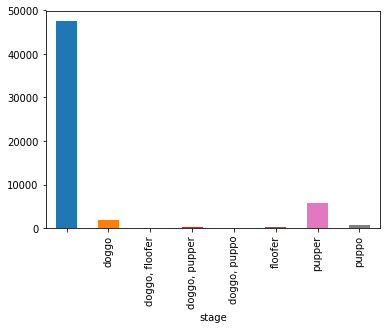

In [269]:
#get number of tweeets across stages of the dogs from histogram
twitter_archive_master.groupby('stage').size().plot(kind='bar')

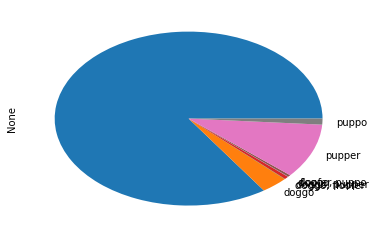

In [270]:
#get number of tweeets across stages of the dogs from pie chart
twitter_archive_master.groupby('stage').size().plot(kind='pie')

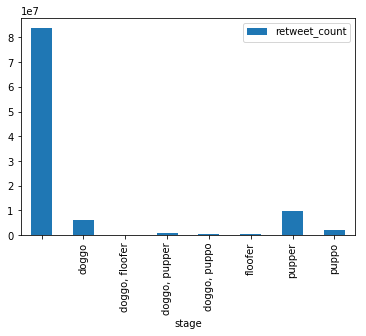

In [271]:
#Get distribution of retweets across various stages.
twitter_archive_master[['stage','retweet_count']].groupby('stage').sum().plot(kind='bar')

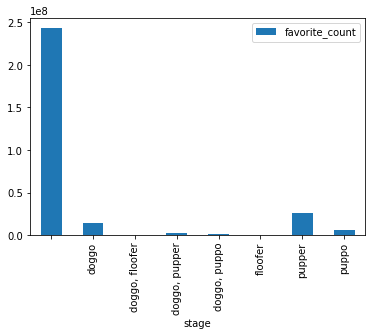

In [272]:
#Get Total favourite stages count across the dogs types
twitter_archive_master[['stage','favorite_count']].groupby('stage').sum().plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5030f65e48>], dtype=object)

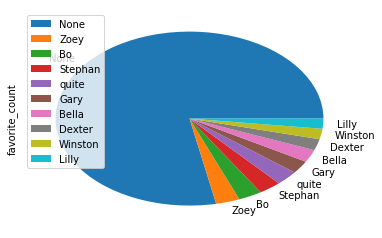

In [273]:
#Get Total favourite stages count across the dogs names
twitter_archive_master[['name','favorite_count']].groupby('name').sum().sort_values('favorite_count', ascending=False).head(10).plot(kind='pie', subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5038649780>], dtype=object)

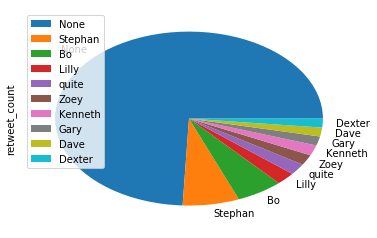

In [274]:
#Get total retweets across different names
twitter_archive_master[['name','retweet_count']].groupby('name').sum().sort_values('retweet_count', ascending=False).head(10).plot(kind='pie', subplots=True)

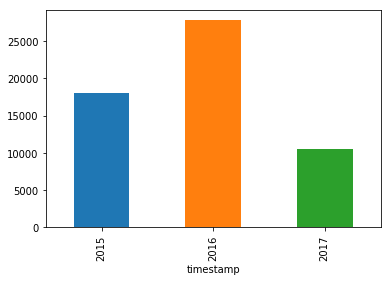

In [275]:
#Plot YoY trend of tweets
twitter_archive_master.groupby(pd.DatetimeIndex(twitter_archive_master['timestamp']).year ).size().plot(kind='bar')